# **CLASSIFICATION MODEL**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_train_gray = tf.image.resize(x_train_gray, size=(28, 28))

In [5]:
x_test_gray = tf.image.rgb_to_grayscale(x_test)
x_test_gray = tf.image.resize(x_test_gray, size=(28, 28))

In [6]:
x_train_gray, x_test_gray = x_train_gray / 255.0, x_test_gray / 255.0

In [7]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [8]:
CNN = Sequential(name="Sequential_CNN")

In [9]:
CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

In [10]:
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

In [11]:
CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

In [12]:
CNN.add(Flatten())

In [13]:
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

In [14]:
CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)             

In [15]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
history = CNN.fit(x_train_gray, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 10s 12ms/step - loss: 1.9753 - accuracy: 0.2737 - val_loss: 1.7730 - val_accuracy: 0.3584
Epoch 2/10
704/704 [==============================] - 9s 13ms/step - loss: 1.6862 - accuracy: 0.3897 - val_loss: 1.6397 - val_accuracy: 0.4062
Epoch 3/10
704/704 [==============================] - 9s 13ms/step - loss: 1.5817 - accuracy: 0.4288 - val_loss: 1.5874 - val_accuracy: 0.4334
Epoch 4/10
704/704 [==============================] - 8s 12ms/step - loss: 1.5092 - accuracy: 0.4586 - val_loss: 1.4861 - val_accuracy: 0.4672
Epoch 5/10
704/704 [==============================] - 9s 13ms/step - loss: 1.4562 - accuracy: 0.4800 - val_loss: 1.4394 - val_accuracy: 0.4916
Epoch 6/10
704/704 [==============================] - 10s 15ms/step - loss: 1.4148 - accuracy: 0.4967 - val_loss: 1.4160 - val_accuracy: 0.4922
Epoch 7/10
704/704 [==============================] - 11s 15ms/step - loss: 1.3837 - accuracy: 0.5080 - val_loss: 1.3793 - val_accuracy: 0.5

In [17]:
test_loss, test_accuracy = CNN.evaluate(x_test_gray, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.3615 - accuracy: 0.5197
Test accuracy: 0.5196999907493591


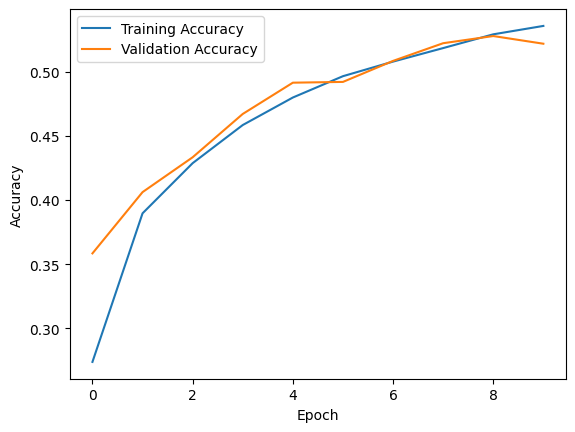

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()